# Gins2: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gene = 'Gins2'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30515006,C57BL/6N,m,control,wt (Gins2),25.0,85.25,52.65,2.73,1.35
1,30515018,C57BL/6N,m,control,wt (Gins2),25.1,95.14,68.62,2.70,0.83
2,30515019,C57BL/6N,f,control,wt (Gins2),21.9,94.78,67.32,1.75,0.61


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30515018,Gins2_1vX_20.dcm,3.219767,3.115833,1.093895,3.152500,637.168142,3.115833,0.663619,high,0.663619,high,41.577006,2.622500,93.692427,66.025641,C57BL/6N,m,control,wt (Gins2),25.1,95.14,68.62,2.70,0.83,0.519767,2.959884,0.263895,0.961948,-1.447573,-2.594359
1,30515018,Gins2_1vX_20.dcm,3.240407,3.210000,1.320930,3.250833,654.545455,3.210000,0.663619,high,0.663619,high,42.226616,4.335969,89.731669,59.235669,C57BL/6N,m,control,wt (Gins2),25.1,95.14,68.62,2.70,0.83,0.540407,2.970203,0.490930,1.075465,-5.408331,-9.384331
2,30515018,Gins2_1vX_20.dcm,3.116570,3.301667,1.300291,3.338333,685.714286,3.301667,0.663619,high,0.663619,high,38.411342,4.158949,89.172603,58.278146,C57BL/6N,m,control,wt (Gins2),25.1,95.14,68.62,2.70,0.83,0.416570,2.908285,0.470291,1.065145,-5.967397,-10.341854
3,30515019,Gins2_1vX_43.dcm,2.146512,0.828333,1.320930,0.859167,750.000000,0.828333,0.867377,high,0.867377,high,15.227180,4.335969,71.524807,38.461538,C57BL/6N,f,control,wt (Gins2),21.9,94.78,67.32,1.75,0.61,0.396512,1.948256,0.710930,0.965465,-23.255193,-28.858462
4,30515019,Gins2_1vX_43.dcm,2.146512,0.908333,0.846221,0.952500,620.689655,0.908333,0.867377,high,0.867377,high,15.227180,1.306686,91.418726,60.576923,C57BL/6N,f,control,wt (Gins2),21.9,94.78,67.32,1.75,0.61,0.396512,1.948256,0.236221,0.728110,-3.361274,-6.743077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,30515018,Gins2_1vX_21.dcm,3.178488,4.353333,0.908140,4.493333,642.857143,4.353333,0.981598,high,0.976827,high,40.294279,1.584791,96.066958,71.428571,C57BL/6N,m,control,wt (Gins2),25.1,95.14,68.62,2.70,0.83,0.478488,2.939244,0.078140,0.869070,0.926958,2.808571
129,30515018,Gins2_1vX_21.dcm,2.889535,4.446667,1.114535,4.569167,648.648649,4.446667,0.976827,high,0.976827,high,31.927461,2.757472,91.363321,61.428571,C57BL/6N,m,control,wt (Gins2),25.1,95.14,68.62,2.70,0.83,0.189535,2.794767,0.284535,0.972267,-3.776679,-7.191429
130,30515018,Gins2_1vX_21.dcm,2.930814,4.539167,0.949419,4.657500,705.882353,4.539167,0.976827,high,0.996680,high,33.057444,1.788553,94.589560,67.605634,C57BL/6N,m,control,wt (Gins2),25.1,95.14,68.62,2.70,0.83,0.230814,2.815407,0.119419,0.889709,-0.550440,-1.014366
131,30515018,Gins2_1vX_21.dcm,3.199128,4.624167,0.804942,4.755833,660.550459,4.624167,0.976827,high,0.996680,high,40.932895,1.139125,97.217091,74.838710,C57BL/6N,m,control,wt (Gins2),25.1,95.14,68.62,2.70,0.83,0.499128,2.949564,-0.025058,0.817471,2.077091,6.218710


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

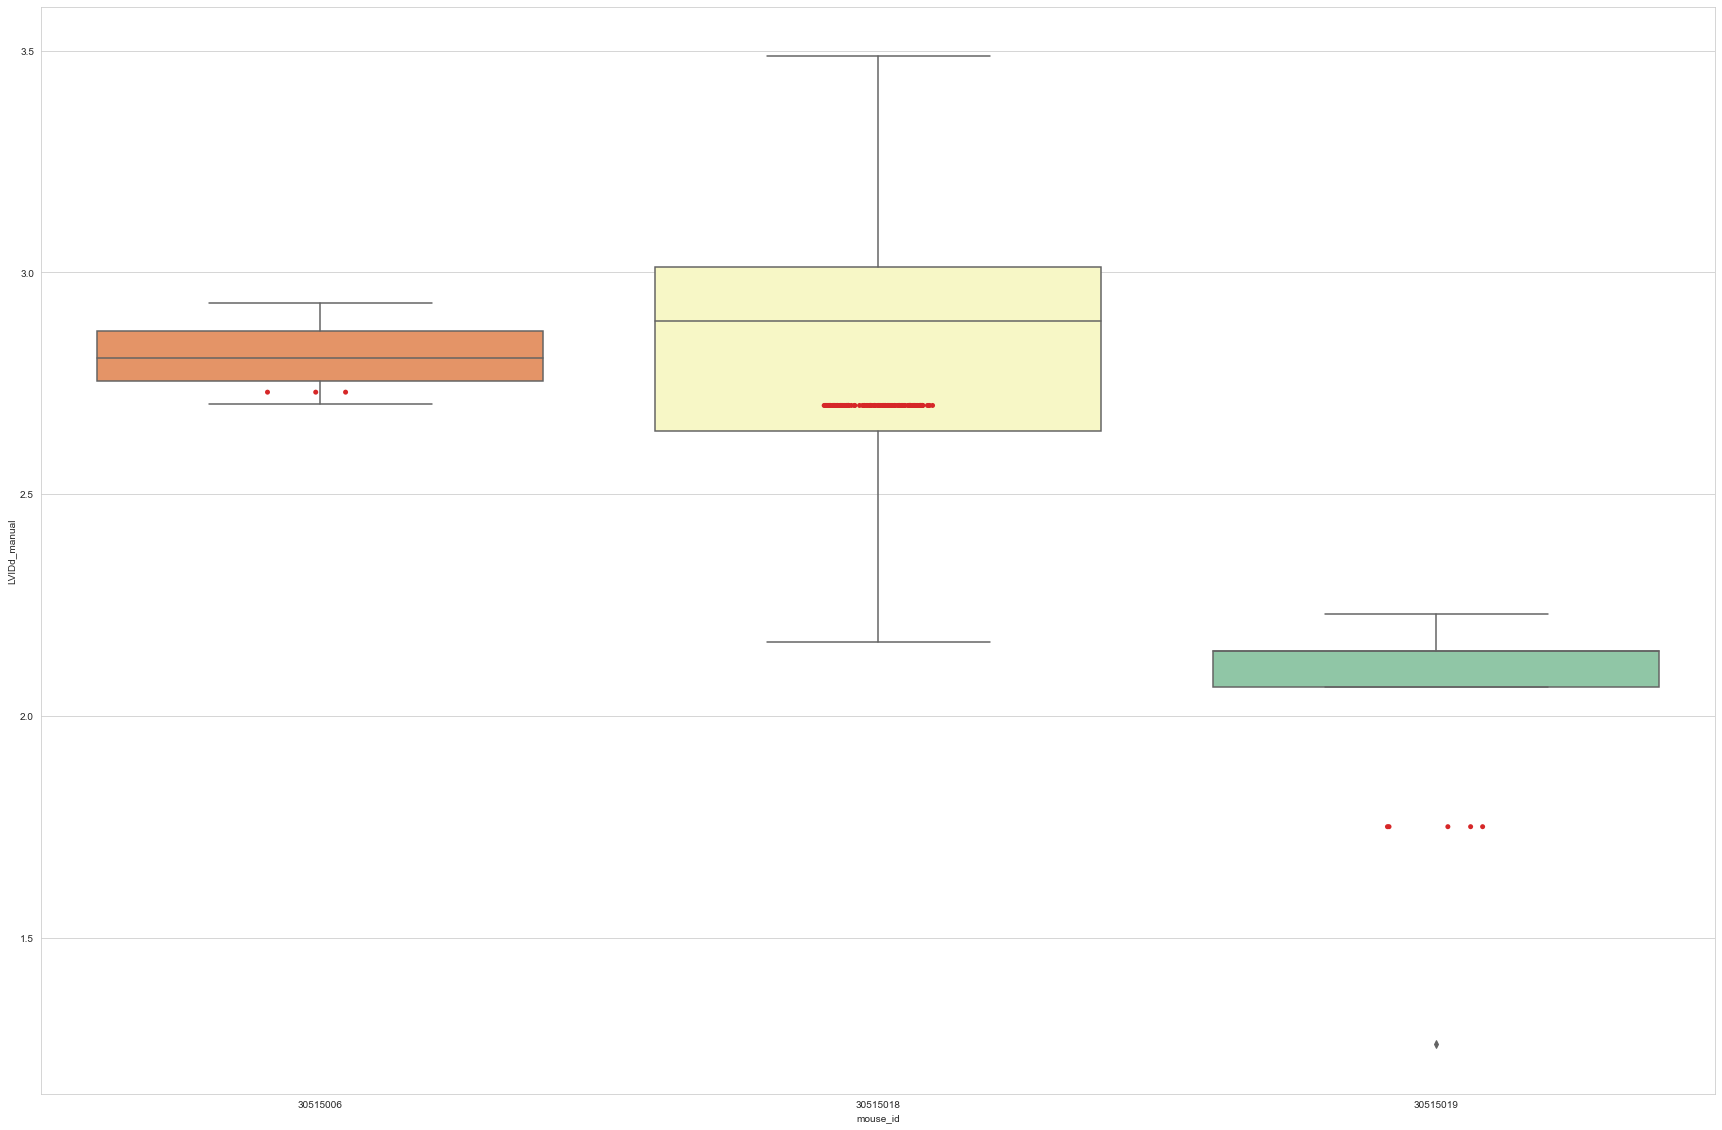

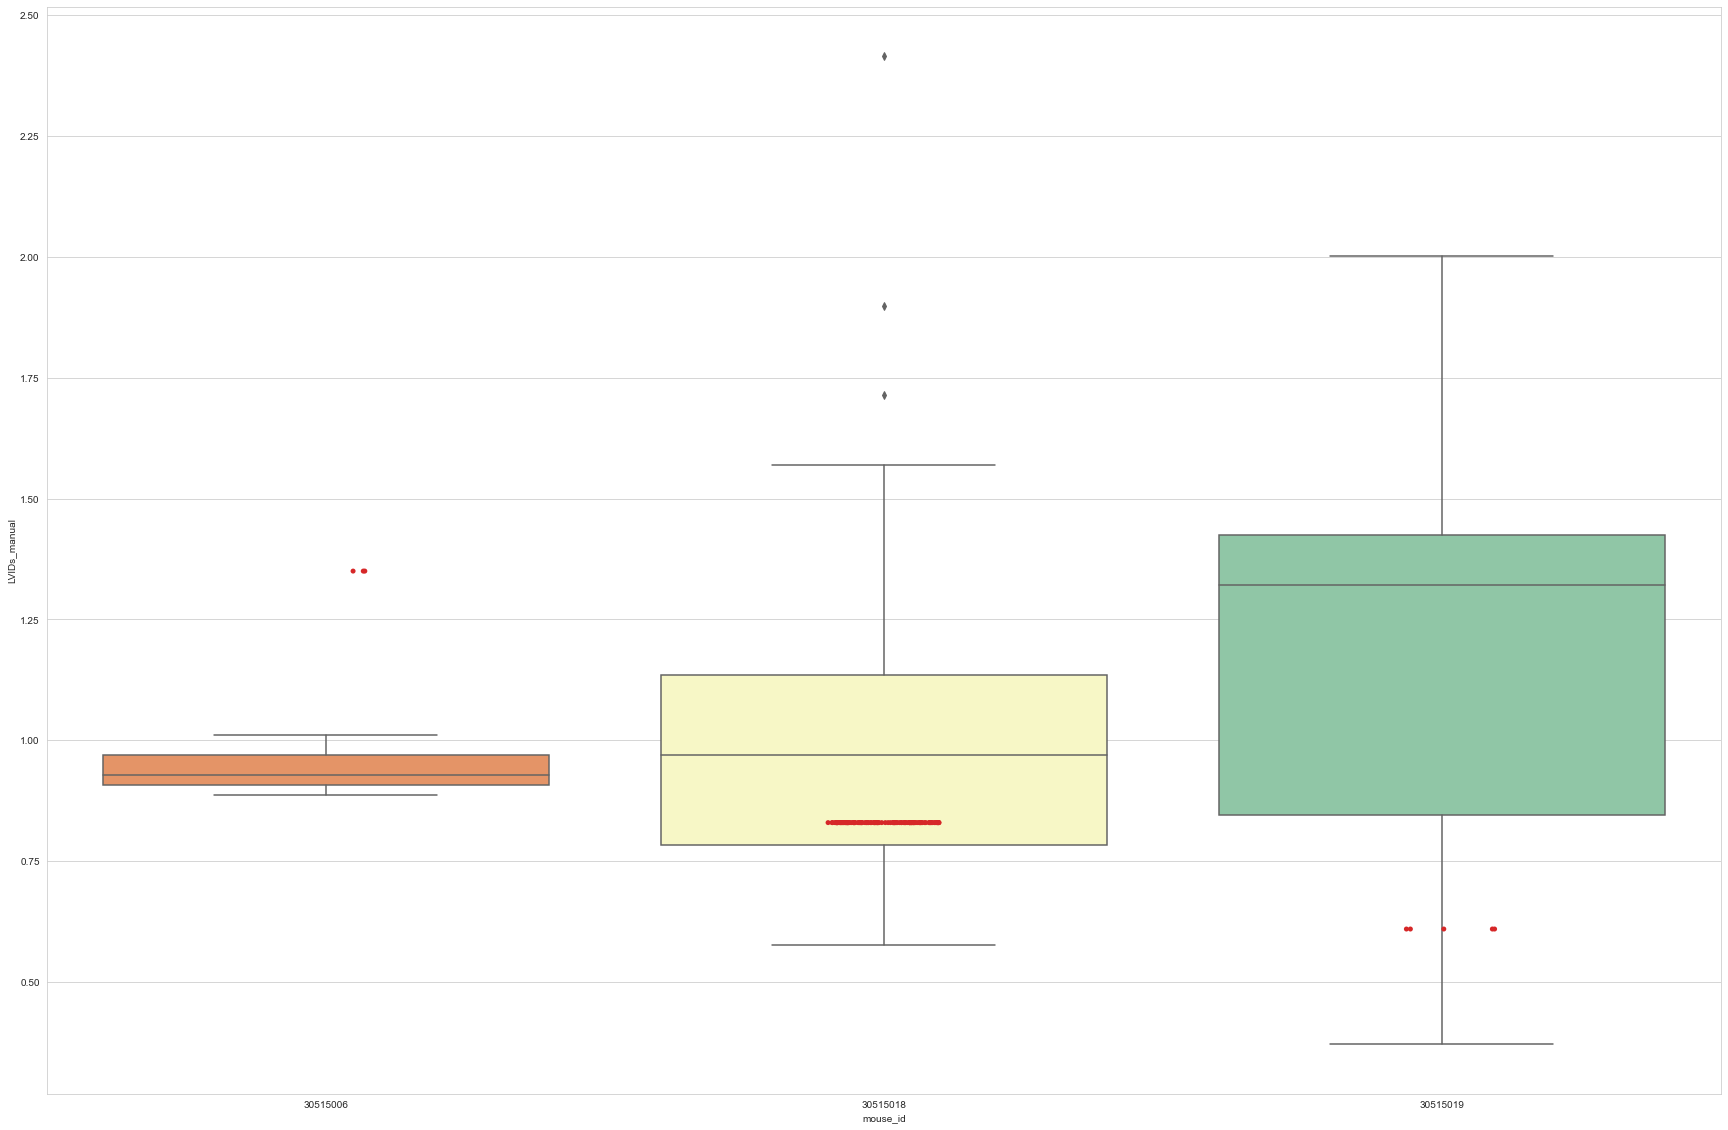

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

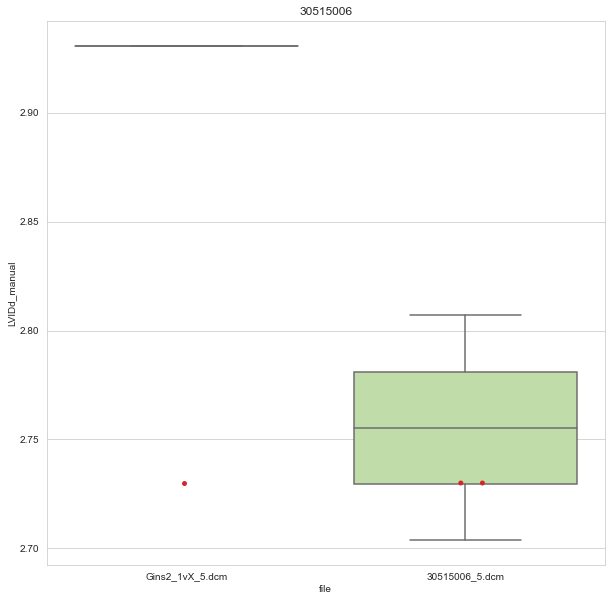

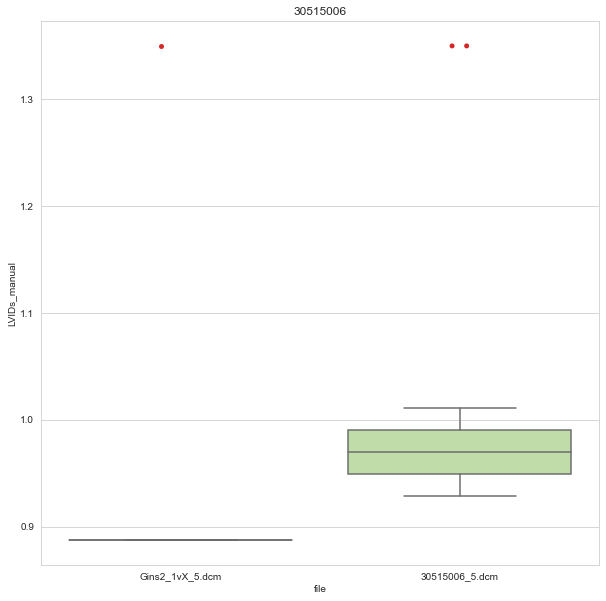

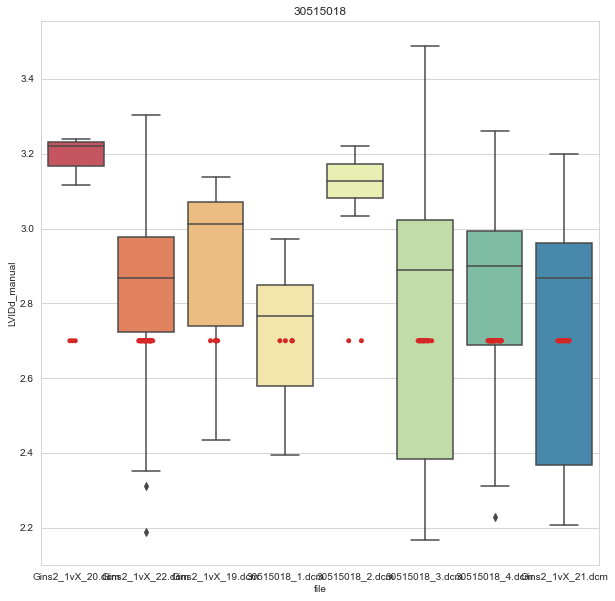

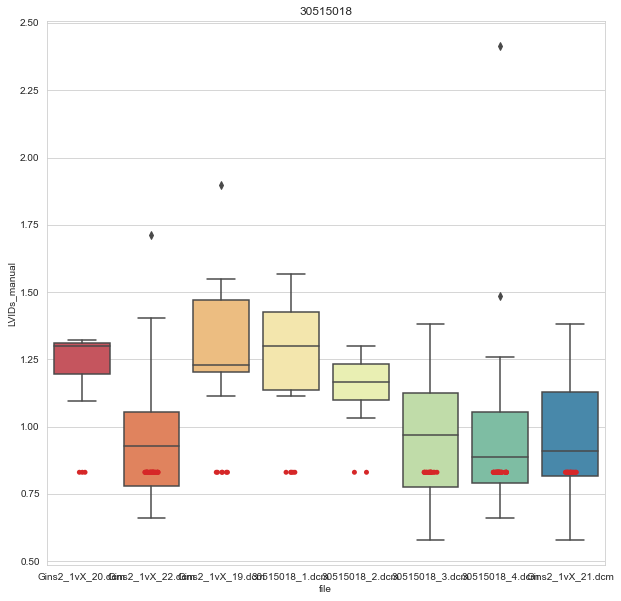

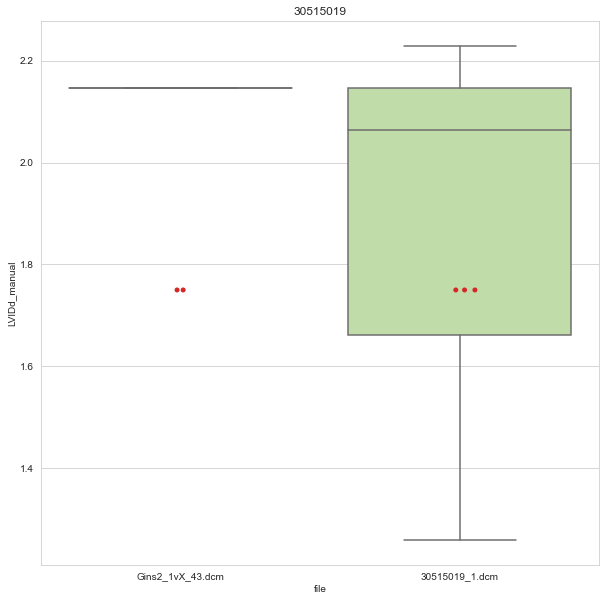

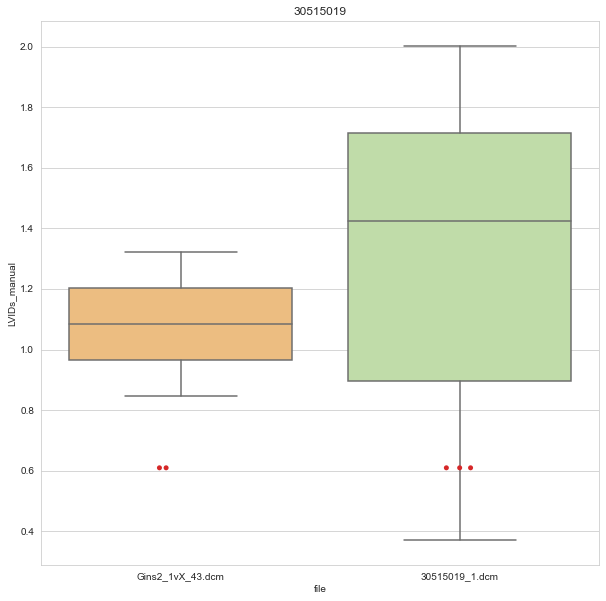

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
1307,30515006,30515006_1,0.000000,100.000000
1308,30515006,30515006_2,0.000000,100.000000
1309,30515006,Gins2_1vX_2,0.000000,100.000000
1310,30515006,30515006_3,0.000000,100.000000
1311,30515006,Gins2_1vX_5,5.292909,94.707091
1312,30515006,30515006_5,5.292909,94.707091
1313,30515006,30515006_4,0.000000,100.000000
1314,30515006,Gins2_1vX_3,0.000000,100.000000
1315,30515018,Gins2_1vX_22,73.530923,26.469077
1316,30515018,Gins2_1vX_21,36.474216,63.525784


### Image quality per mouse

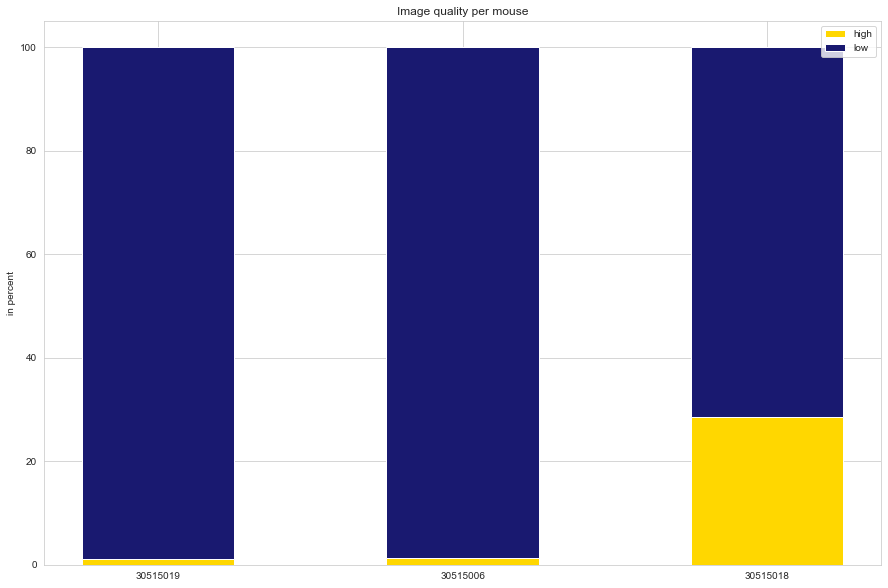

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Gins2,10.68,89.32


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,133.00,133.00,133.00,133.00
mean,0.12,0.18,-3.97,-4.89
std,0.29,0.31,10.32,11.46
min,-0.53,-0.46,-70.97,-57.13
25%,-0.06,-0.05,-5.08,-9.02
50%,0.19,0.14,-1.50,-3.13
75%,0.31,0.33,1.03,2.81
max,0.79,1.58,10.25,17.07
number of mice,3.00,3.00,3.00,3.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,1,1
m,2,2


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')